**Cases, hospitalizations, ICU, deaths by vaccination status in Italy**

Data source: github.com/apalladi/covid_vaccini_monitoraggio

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from custom.plot_utils import get_xticks_labels

plt.style.use("seaborn")

In [2]:
apalladi = "https://raw.githubusercontent.com/apalladi/covid_vaccini_monitoraggio/main/dati/dati_ISS_complessivi.csv"
df = pd.read_csv(apalladi, sep=";", index_col="data", parse_dates=["data"])
df.head()

,non vaccinati,vaccinati 1 dose,vaccinati completo,vaccinati booster,casi non vaccinati,casi vaccinati 1 dose,casi vaccinati,casi booster,ospedalizzati non vaccinati,ospedalizzati vaccinati 1 dose,ospedalizzati vaccinati,ospedalizzati booster,terapia intensiva non vaccinati,terapia intensiva vaccinati 1 dose,terapia intensiva vaccinati,terapia intensiva booster,decessi non vaccinati,decessi vaccinati 1 dose,decessi vaccinati,decessi booster
data,,,,,,,,,,,,,,,,,,,,
2021-12-28,6876688,1504168,45629089,5694939,170551,14491,385856,20375,7059,358,7229,368,1036,32,555,33,994,75,1262,62
2021-12-21,7031651,1502381,45475912,4133267,140677,9069,254999,7655,5944,316,6384,272,887,26,466,26,839,54,1105,45
2021-12-15,7160934,1577260,45271750,3060479,114674,7107,198287,4219,5081,284,5451,176,747,21,406,12,722,42,991,29
2021-12-07,7291722,1749607,44968615,2189265,93220,6181,161951,2652,4402,247,4653,121,618,17,356,8,620,29,807,17
2021-12-01,7404599,1981131,44624214,1594076,75512,5587,128488,1710,3733,217,3845,74,546,16,285,3,515,22,690,11


- non vaccinati: unvaccinated
- vaccinati 1 dose: vaccinated with 1 dose
- vaccinati: fully vaccinated
- booster: fully vaccinated+booster

- casi: cases
- ospedalizzati: hospitalizations
- terapia intensiva: ICU
- Decessi: deaths

**Plot events ratio**

In [3]:
# Function to calculate rates per 100.000 people
# See: cdc.gov/csels/dsepd/ss1978/lesson3/summary.html

def get_rates(selection="non vaccinati"):
      sel_pop = df[selection]

      if selection != "non vaccinati":
            selection = "booster" if selection == "vaccinati booster" else "vaccinati"

      casi = df[f"casi {selection}"]/sel_pop*10**5
      osp = df[f"ospedalizzati {selection}"]/sel_pop*10**5
      ti = df[f"terapia intensiva {selection}"]/sel_pop*10**5
      deaths = df[f"decessi {selection}"]/sel_pop*10**5
      return [casi, osp, ti, deaths]

**Defining the populations**

In [4]:
populations = ["non vaccinati", "vaccinati completo", "vaccinati booster"]
events = ["casi non vaccinati", "ospedalizzati non vaccinati", "terapia intensiva non vaccinati", "deceduti non vaccinati"]

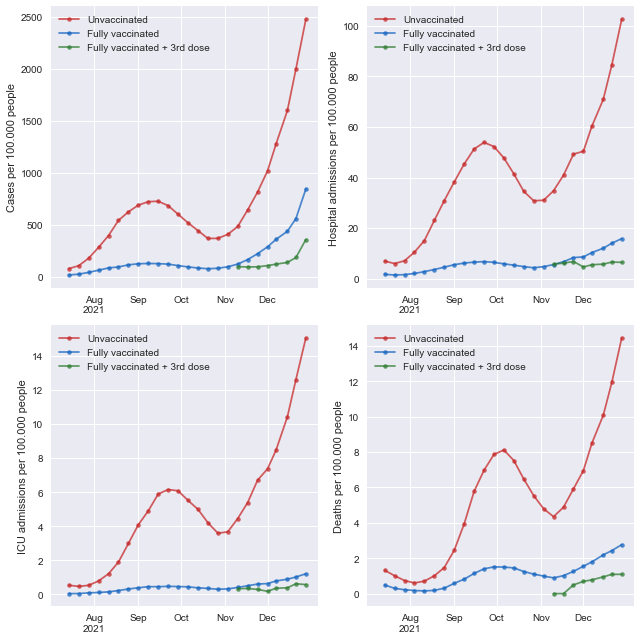

In [5]:
# set plot properties
mpl.rcParams["lines.markersize"] = 4.5
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=["#c62828", "#1565c0", "#2e7d32"])

# get ticks, labels
ticks, labels = get_xticks_labels(df.index)
ylabels = ["Cases", "Hospital admissions", "ICU admissions", "Deaths"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
axes = ax.ravel()

for pop in populations:
      ratios = get_rates(pop)
      for i in range(4):
            # plot
            axes[i].plot(ratios[i], alpha=0.75, marker="o")
            # set labels/legend
            axes[i].set_ylabel(ylabels[i] + " per 100.000 people")
            axes[i].set_xticks(ticks)
            axes[i].set_xticklabels(labels)
            axes[i].legend(["Unvaccinated",
                            "Fully vaccinated",
                            "Fully vaccinated + 3rd dose"])
fig.tight_layout()
plt.show()